In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

togo = pd.read_csv('../data/togo_clean.csv')
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv')

togo['Country'] = 'Togo'
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'

df_all = pd.concat([togo, benin, sierra_leone], ignore_index=True)


Compare Key Metrics

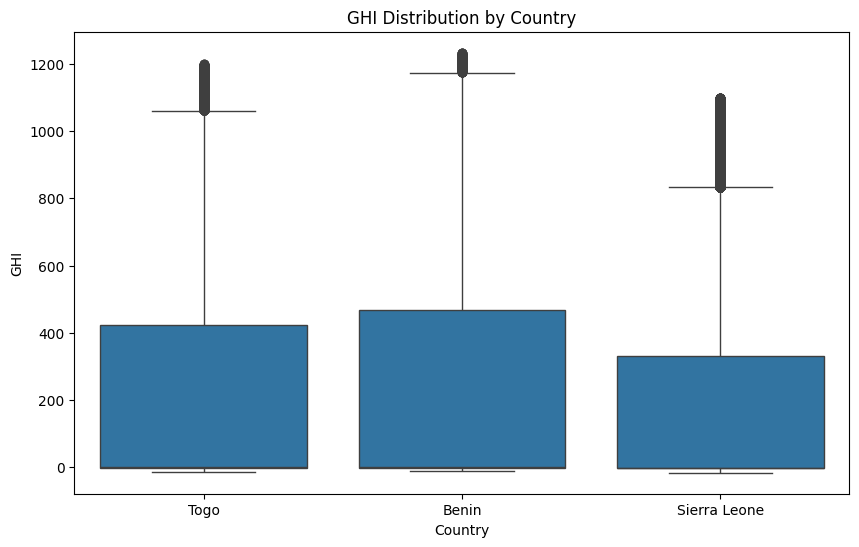

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='Country', y='GHI')
plt.title('GHI Distribution by Country')
plt.show()


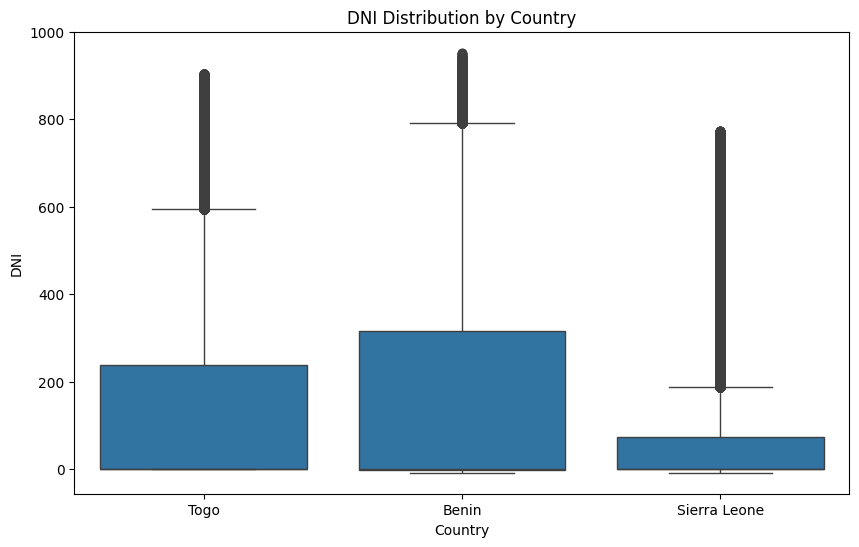

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='Country', y='DNI')
plt.title('DNI Distribution by Country')
plt.show()

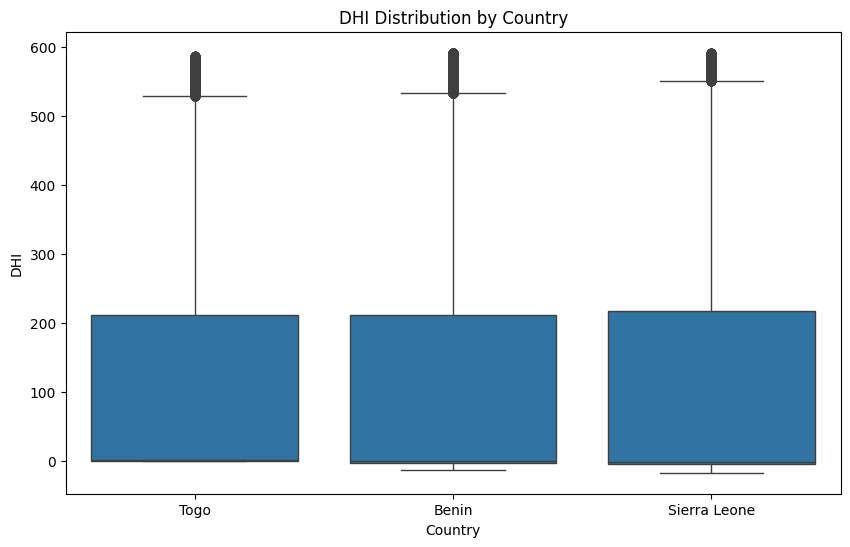

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='Country', y='DHI')
plt.title('DHI Distribution by Country')
plt.show()

Summary

In [5]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

Statistical Test

In [8]:
from scipy.stats import f_oneway

f_oneway(
    togo['GHI'].dropna(),
    benin['DNI'].dropna(),
    sierra_leone['DHI'].dropna()
)

F_onewayResult(statistic=np.float64(26624.931079701422), pvalue=np.float64(0.0))

### 🔍 Key Observations

- **Benin** shows the highest average **GHI** and **DNI**, indicating strong potential for both general solar harvesting and direct sunlight applications.
- **Togo** has a relatively high and consistent **DHI** (highest median), which suggests it receives more stable diffuse radiation beneficial in cloudy or partially shaded environments.
- **Sierra Leone** has the lowest overall solar irradiance (GHI and DNI), making it less favorable for high-efficiency solar deployment, though it maintains competitive DHI values.


Text(0.5, 1.0, 'Mean GHI by Country')

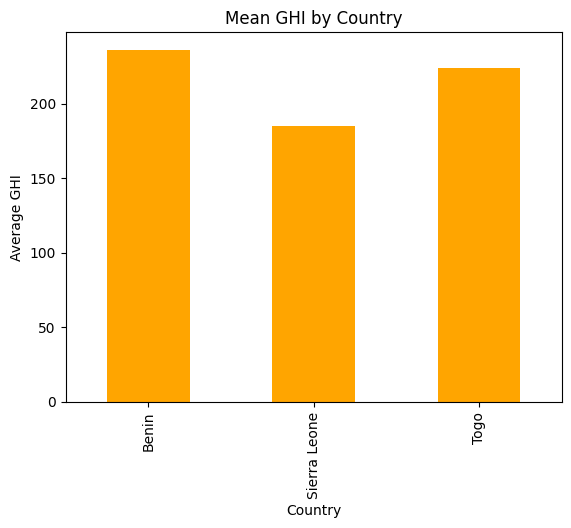

In [9]:
df_all.groupby('Country')['GHI'].mean().plot(kind='bar', color='orange')
plt.ylabel('Average GHI')
plt.title('Mean GHI by Country')